# Youtube Data Exploration & Cleaning

!["Bronze Button"](https://pbs.twimg.com/media/C1WZpigXUAQMQLj.jpg)

## 1.0 Imports

We locally import the Youtube datasets using Pandas. Thereafter, we utilize Pprint at some point to easily visualize and identify ouput.

The regions of the Youtube video information are the following:

1. Canada

2. United States of America

3. Great Britain

4. France

5. Germany

In [1]:
#Minimum requirements for cleaning

import pandas as pd
import pprint

import matplotlib.pyplot as plt

In [2]:
#Import Canadian, American, British, French, and Germany Youtube video data, respectively

caVideo_df = pd.read_csv("../Data/CAvideos.csv")
usaVideo_df = pd.read_csv("../Data/USvideos.csv")
gbVideo_df = pd.read_csv("../Data/GBvideos.csv")
frVideo_df = pd.read_csv("../Data/FRvideos.csv")
deVideo_df = pd.read_csv("../Data/DEvideos.csv")


## 2.0 Inspection

We first evaluate the type of features we have for our datasets. Moreover, we identify a few characteristics of the information!

### 2.1 What features we have available, type of info we have

In [3]:
frVideo_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor|""Dissident""|""Expliquez""|""moi""|""cette""|""...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...


### 2.2 Total Count of Rows and Features

In [4]:
print("Total of rows and features for Canada:, ",caVideo_df.shape)
print("Total of rows and features for USA:, ",usaVideo_df.shape)
print("Total of rows and features for Great Britain:, ",gbVideo_df.shape)
print("Total of rows and features for France:, ",frVideo_df.shape)
print("Total of rows and features for Germany:, ",deVideo_df.shape)

Total of rows and features for Canada:,  (10592, 16)
Total of rows and features for USA:,  (10600, 16)
Total of rows and features for Great Britain:,  (10593, 16)
Total of rows and features for France:,  (10594, 16)
Total of rows and features for Germany:,  (10597, 16)


We observe discrepancies between the amount of rows for each dataframe. I do not have any future intentions to join the dataset, because they are in no way relational by feature. However, since these dataframes have the same amount of columns. I would like to concantente the information into one dataset, with their Country of origin being the 17th column, for future analysis.

The processing speed to evaluate this information will be slower. However, it is not significant to affect the computational computing for our computers, as seen later 

Hint: Dropping Features

### 2.3 Descriptive Statistics and Thoughts


IDEA: Make a function to easily build up the visualizations? This would also work in another file by making such a thing a .py file

#### 2.3.1

[43328.312405589124, 47502.104433962268, 70507.231756820547, 15950.496507457052, 20109.812871567425] range(0, 5)


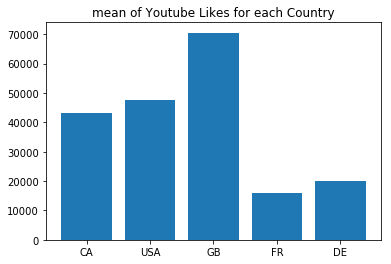

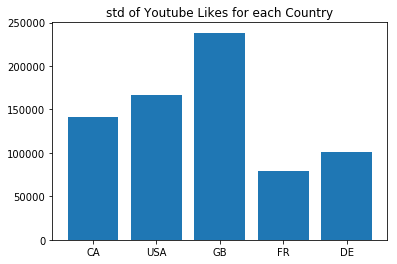

In [5]:
cols = ["views","likes","dislikes","comment_count"]
dtypes = "int64"
country = ["CA", "USA", "GB", "FR","DE"]
def dataframe_stats(columns, stats, countries,dtype ):
    ca_graph = caVideo_df.describe(include = [dtype])[columns]
    usa_graph = usaVideo_df.describe(include = [dtype])[columns]
    gb_graph = gbVideo_df.describe(include = [dtype])[columns]
    fr_graph = frVideo_df.describe(include = [dtype])[columns]
    de_graph = deVideo_df.describe(include = [dtype])[columns]

    temp = [ca_graph, usa_graph, gb_graph, fr_graph, de_graph]

    means = []
    std = []

    for a in stats:
        for i in range(0,5):
            if a is "mean":
                means.append(temp[i].loc[a,"likes"])
            else:
                std.append(temp[i].loc[a,"likes"])
    li = list(ca_graph.columns)
    ina = range(0,5)
    for b in stats:
        plt.xticks(ina, countries )
        plt.title("%s of Youtube Likes for each Country" % b)
        if b is "mean":
            print(means,ina)
            plt.bar(ina, means)
        else:
            plt.bar(ina,std)
        plt.show()
dataframe_stats(cols, stats = ["mean","std"],countries = country, dtype =dtypes)

In [6]:
print("Descriptive Statistics of features for Canada:\n\n ",caVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for USA:\n\n  ",usaVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for Great Britain:\n\n  ",gbVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for France:\n\n ",frVideo_df.describe(include = ["int64"]))
print("Descriptive Statistics of features for Germany:\n\n ",deVideo_df.describe(include = ["int64"]))

Descriptive Statistics of features for Canada:

          category_id         views         likes      dislikes  comment_count
count  10592.000000  1.059200e+04  1.059200e+04  1.059200e+04   10592.000000
mean      20.829494  1.188602e+06  4.332831e+04  2.865920e+03    5673.249717
std        6.782456  4.137523e+06  1.418641e+05  3.466778e+04   25659.394553
min        1.000000  1.141000e+03  0.000000e+00  0.000000e+00       0.000000
25%       20.000000  1.437375e+05  2.154000e+03  1.030000e+02     409.000000
50%       24.000000  3.538290e+05  9.326000e+03  2.990000e+02    1334.000000
75%       24.000000  9.616615e+05  3.030625e+04  1.021250e+03    3940.000000
max       43.000000  1.378431e+08  3.014479e+06  1.602383e+06  827755.000000
Descriptive Statistics of features for USA:

           category_id         views         likes      dislikes  comment_count
count  10600.000000  1.060000e+04  1.060000e+04  1.060000e+04   1.060000e+04
mean      19.966887  1.298616e+06  4.750210e+04  3.2255

#### 2.3.2 Datatypes

Because every dataset is derived from the same source, we can print out the datatypes for every dataset from one of them. I.e. We print out the datatypes for one dataset, instead of for all.

The following are the datatypes for every dataset.

(Note: If you would like validate any discrepancies, you can uncomment the comment section)

In [14]:
print("Data Types of and features for all datasets:\n\n  ",caVideo_df.dtypes)



#Addresses the Note, from the above comment section
#--------------------------------------------------------
#print("Data Types of and features for Canada:\n\n  ",caVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for USA:\n\n  ",usaVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for Great Britain:\n\n ",gbVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for France:\n\n  ",frVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for Germany:\n\n  ",deVideo_df.dtypes)

Data Types of and features for all datasets:

   video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object


In this portion, we notice that we have a couple of unneccasary pieces of information to analyze this data. 

Moreover, can we identify any trivial cases of information that may be affected from:

1. Poor Derivation

2. Extraction

3. Other Potential Modification? 

We find out in the following **Cleaning** portion section. 

## 3.0 Cleaning

### 3.1 Identifying Null Values

In [8]:
video_list = [caVideo_df, gbVideo_df, frVideo_df, deVideo_df, usaVideo_df]

caVideo_columns = list(caVideo_df.columns)
gbVideo_columns = list(gbVideo_df.columns)
frVideo_columns = list(frVideo_df.columns)
deVideo_columns = list(deVideo_df.columns)
usaVideo_columns = list(usaVideo_df.columns)

video_list_str = ["caVideo_nullCount", "gbVideo_nullCount", 
              "frVideo_nullCount", "deVideo_nullCount", "usaVideo_nullCount"]

In [9]:
allVideos_nullCount = {}
for index, videos in enumerate(video_list):
    temp_dic = {}
    for col in videos:
        #temp_dic = {}
        null_val = videos[col].isnull().values.sum()
        temp_dic[col] = null_val
    allVideos_nullCount[video_list_str[index]] = temp_dic

In [10]:
pprint.pprint(allVideos_nullCount )

{'caVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 309,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
                       'ratings_disabled': 0,
                       'tags': 0,
                       'thumbnail_link': 0,
                       'title': 0,
                       'trending_date': 0,
                       'video_error_or_removed': 0,
                       'video_id': 0,
                       'views': 0},
 'deVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 446,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
        

We identify that the Description feature for every dataset contains a lack of information, or just non-entered information. In regards to Semantic Analysis, having no description is vital. 

However, there are two things to think about for the concern of this information

1. The total amount of non-entered values isn't significant enough to cause a concern for validating them or more. Moreover, the upcoming analysis, seperate from this documentation, doesn't has its concerns centered around Natural Language Processing and Semantic Analysis

2. If we look at the following Channel Users and Titles of the videos for every country, we observe that these videos are from non-influencers such as fan-made creations, commentators, or others.

In [27]:
usaVideo_df[usaVideo_df["description"].isnull() == True][["title","channel_title"]]

,title,channel_title
42,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
47,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube
175,Sphaera - demonstrating interaction,Jenny Hanell
267,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
312,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube
446,Devin Booker has words with Lakers assistant J...,NBA Highlights · YouTube
523,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
632,Jaylen Brown delivers emotional press conferen...,MassLive
678,Devin Booker has words with Lakers assistant J...,NBA Highlights · YouTube
750,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach


In [28]:
caVideo_df[caVideo_df["description"].isnull() == True][["title","channel_title"]]

,title,channel_title
98,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生
115,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER
128,Pres. Trump: Putin's Denials Of Interference I...,The View
165,Outlander S03E09 i'm melting with you'',Ella bell
179,شاهد انبهار الاعلام المصري بتأهل المغرب لكأس ...,Info Press
182,بالفيديو ... سعد الحريري يتلقى معلومة من خلف ا...,tayyar.org
276,Writer: My Kids Can't Be Friends With White Pe...,The View
350,习大大李克强乘风破浪全线出击 中日韩东盟空前合体 特朗普遭重创提前出局？,炮座新观察【各路嘉宾 每日热评】
371,WATCH LIVE: Attorney General Sessions testifie...,PBS NewsHour
437,Il fait la statue et échappe à la police penda...,jean registre


In [29]:
gbVideo_df[gbVideo_df["description"].isnull() == True][["title","channel_title"]]

,title,channel_title
91,Bone on Labour HQ,Ross Kempsell
118,Arvo Pärt - Tabula Rasa,JSaxofone
187,Brad Bufanda Demo Reel,EinsteinEnt
309,Bone on Labour HQ,Ross Kempsell
336,Arvo Pärt - Tabula Rasa,JSaxofone
394,Brad Bufanda Demo Reel,EinsteinEnt
521,Bone on Labour HQ,Ross Kempsell
546,Arvo Pärt - Tabula Rasa,JSaxofone
760,Bone on Labour HQ,Ross Kempsell
787,Arvo Pärt - Tabula Rasa,JSaxofone


In [30]:
deVideo_df[deVideo_df["description"].isnull() == True][["title","channel_title"]]

,title,channel_title
67,Hayattta Her Şey Var 13 Kasım 2017,Hayatta Her Şey Var
145,Outlander S03E09 i'm melting with you'',Ella bell
171,شاهد بالفيديو الهزة الارضية في داخل استديو قنا...,عراق فاملي-iraq family
175,คุยเเซ่บShow : เปิดใจ ลูก เมีย โจ บอยสเก๊าท์ ค...,Orange Mama
254,Kim wird von Jacky psychisch zerstört! | Berli...,BerlinTagUndNacht
281,13.11.2017 PEGIDA live vom Hauptbahnhof Dresden,Lutz Bachmann
290,Eşkıya Dünyaya Hükümdar Olmaz 81.Bölüm Fragman...,Sneak Peek videoları
292,Familie Dr Kleist Folge 83 Freunde oder mehr,Familie Dr Kleist
296,Joe & David in der Falle😮 |Berlin Tag und Nacht,Köln 50667 BTN Exklusiv!
308,King of Queens Mut zur Dummheit,Adem Korkmaz


Therefore, we sadly delete the the rows that contain a lack of information in the description feature. 

(**Note:** I do not recommend such conclusions in analyses. Deleting information creates misinformation, potential biases, and more. However, we can choose to delete this cases for the sake of lack of importance or dependency of this project. 

I.e. This is a side project, and it's no concern.)

Addtional note: Did you see those Donald Trump Channel users? Interesting amount of imposter channels based of him...weird.

### 3.2 New Feature

For our analysis, may want to want to add a new feature "Country", for all datasets concatentated. 

This categorical variable allows us to obersve a new dimension in visualizations.

In [11]:
caVideo_df["Country"] = ["CA" for  x in range(0,len(caVideo_df) )]
usaVideo_df["Country"] = ["USA" for x in range(0,len(usaVideo_df) )]
gbVideo_df["GB"] = ["GB" for x in range(0,len(gbVideo_df) )]
frVideo_df["FR"] = ["FR" for x in range(0,len(frVideo_df) )]
deVideo_df["DE"] = ["DE" for x in range(0,len(deVideo_df) )]

In [12]:
gbVideo_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,GB
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [37]:
#Delete Rows containing nulls in Description column for all datasets
caVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
usaVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
gbVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
deVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
frVideo_df.dropna(axis = 0, subset=["description"], inplace = True)


## Export

## Resources